In [1]:
import sys
sys.path.insert(0, 'net/')

from net import net
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
fc = net()
# height,width,depth
fc.add_layer('input',shape=(2,),batch=128)
fc.add_layer('fc',num_neurons=25,activation='relu')
fc.add_layer('fc',num_neurons=25,activation='relu')
fc.add_layer('output',num_neurons=2,activation='softmax')

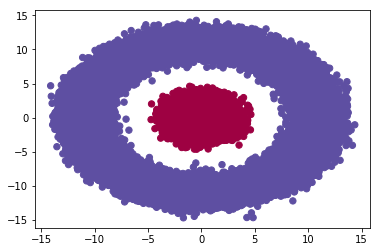

In [3]:
steps = 100000
h = 0
k = 0
r = 1
labels = np.zeros((steps))
Y = np.zeros((steps,2))
X = np.zeros((steps,2))
counter = 0
theta = np.arange(0,2*3.14,2*3.14/50000)

for i in range(2): 
    for t in theta:
        X_ = h + r*math.cos(t) + np.random.randn()
        Y_ = k - r*math.sin(t) + np.random.randn()
        X[counter] = np.array([X_,Y_])
        labels[counter] = i
        Y[counter,i] = 1
        counter +=1
    r += 10

plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap=plt.cm.Spectral)
plt.show()

In [4]:
c = np.c_[X.reshape(len(X), -1), Y.reshape(len(Y), -1)]

X = c[:, :X.size//len(X)].reshape(X.shape)
Y = c[:, X.size//len(X):].reshape(Y.shape)

accuracy = 0

for _ in range(2):
	for i in range(0,len(X)):
		predictions = fc.forward(X[i])
		#print "predictions", predictions
		#print predictions
		index = np.argmax(predictions)
		gradient = fc.cross_entropy_gradient(predictions,Y[i])
		#loss = fc.get_cost(predictions,y[i])
		fc.backward(gradient)


for i in range(0,len(X)):
	predictions = fc.forward(X[i])
	#print "predictions", predictions
	#print predictions
	index = np.argmax(predictions)
	
	#print index
	if Y[i][index] == 1:
		accuracy += 1

	counter += 1

print("Accuracy:",accuracy/float(len(X)))

layers/fully_connected_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:
layers/output_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:


Accuracy: 0.93377


layers/fully_connected_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:
layers/output_layer.py:44: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.weights == None:


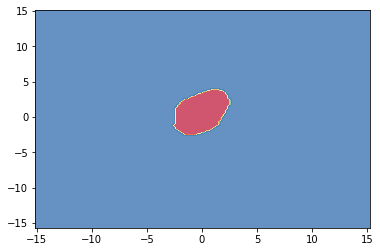

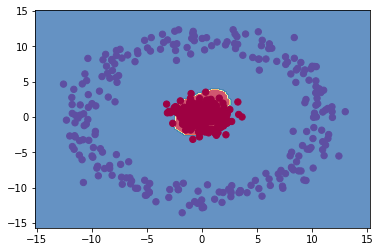

In [5]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

new_x = xx.ravel()
new_y = yy.ravel()

counter = 0
Z = np.zeros((new_x.shape[0],2))
for ix in range(len(new_x)): 
    Z[counter] = fc.forward(np.array([new_x[ix],new_y[ix]]).reshape(2,1))
    counter += 1


Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.show()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[::200,0],X[::200,1],c=labels[::200],s=40,cmap=plt.cm.Spectral)

plt.show()